Практическая работа №2

In [1]:
import multiprocessing as mp
import time
import os
from typing import Any, Generator, Literal

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import models as torch_model
import seaborn as sns

%matplotlib inline

c:\Users\blizz\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Не найдена указанная процедура'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class Trainer(object):
    def __init__(
        self,
        model: nn.Module,
        train_dataloader: DataLoader,
        test_dataloader: DataLoader,
        optimizer: Any,
        loss: Any,
        device: Literal["cuda", "cpu"],
    ) -> None:
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.optimizer = optimizer
        self.loss = loss
        self.device = device

    def _train_loop(self) -> float:
        self.model.train()

        corrects_quantity = 0
        total = 0

        for images, labels in self.train_dataloader:
            self.optimizer.zero_grad()

            images = images.type(torch.float32)
            images = images.to(self.device)
            labels = labels.to(self.device)

            preds = self.model(images)

            loss = self.loss(
                preds.type(torch.float32),
                F.one_hot(labels, num_classes=10).type(torch.float32),
            )

            corrects = labels == preds.argmax(dim=1)
            corrects_quantity += int(corrects.sum())

            loss.backward()
            self.optimizer.step()
            total += len(preds)

        return corrects_quantity / total

    def _test_loop(self) -> float:
        self.model.eval()
        corrects_quantity = 0
        total = 0

        with torch.no_grad():
            for images, labels in self.test_dataloader:
                self.optimizer.zero_grad()

                images = images.type(torch.float32)

                images = images.to(self.device)
                labels = labels.to(self.device)

                preds = self.model(images)

                corrects = labels == preds.argmax(dim=1)
                corrects_quantity += int(corrects.sum())
                total += len(preds)

        return corrects_quantity / total

    def train(self, epoch_num: int) -> Generator[nn.Module, None, None]:
        for epoch_no in range(epoch_num):
            start_time = time.time()
            train_accuracy = self._train_loop()
            time_of_train = time.time() - start_time

            start_time = time.time()
            test_accuracy = self._test_loop()
            time_of_test = time.time() - start_time

            print(f"Epoch: {epoch_no + 1}")
            print(f"Train accuracy: {train_accuracy:.4f}, time: {time_of_train:.2f}")
            print(f"Test accuracy: {test_accuracy:.4f}, time: {time_of_test:.2f}")

            yield self.model

In [3]:
def train(
    model, device, train_dataloader, test_dataloader, optimizer, loss, epochs_num
) -> None:
    model = model
    model = model.to(device)

    trainer = Trainer(
        model,
        train_dataloader,
        test_dataloader,
        optimizer,
        loss,
        device,
    )

    for model in trainer.train(epochs_num):
        print()

Модификации

In [4]:
def optim1(in_features):

    return nn.Linear(in_features, 10)


def optim2(in_features):
 
    return nn.Sequential(
        nn.Linear(in_features, in_features//2),
        nn.ReLU(),
        nn.Linear(in_features//2, 10),
        )

In [5]:
LEARNING_RATE = 0.001
BATCH_SIZE = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LOSS = torch.nn.CrossEntropyLoss()

ResNet18

optimization 1

In [6]:
NETWORK = torch_model.resnet18(torch_model.ResNet18_Weights.DEFAULT)

transform = torch_model.ResNet18_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.fc = optim1(512)

OPTIMIZER = torch.optim.Adam(
    NETWORK.fc.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

c:\Users\blizz\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
Epoch: 1
Train accuracy: 0.6817, time: 87.90
Test accuracy: 0.7586, time: 33.92

Epoch: 2
Train accuracy: 0.7608, time: 86.90
Test accuracy: 0.7673, time: 33.74

Epoch: 3
Train accuracy: 0.7719, time: 85.43
Test accuracy: 0.7797, time: 33.45

Epoch: 4
Train accuracy: 0.7770, time: 86.78
Test accuracy: 0.7812, time: 33.02

Epoch: 5
Train accuracy: 0.7811, time: 87.07
Test accuracy: 0.7817, time: 33.36


Total time: 601.64


optimization 2

In [7]:
transform = torch_model.ResNet18_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.resnet18(torch_model.ResNet18_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.fc = optim2(512)

OPTIMIZER = torch.optim.Adam(
    NETWORK.fc.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1
Train accuracy: 0.7196, time: 82.27
Test accuracy: 0.7637, time: 31.79

Epoch: 2
Train accuracy: 0.7660, time: 85.43
Test accuracy: 0.7819, time: 32.28

Epoch: 3
Train accuracy: 0.7747, time: 84.15
Test accuracy: 0.7761, time: 32.17

Epoch: 4
Train accuracy: 0.7825, time: 83.81
Test accuracy: 0.7699, time: 32.79

Epoch: 5
Train accuracy: 0.7950, time: 85.69
Test accuracy: 0.7863, time: 33.22


Total time: 583.59


DenseNet121

optimization 1

In [8]:
transform = torch_model.DenseNet121_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.densenet121(torch_model.DenseNet121_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.classifier = optim1(1024)

OPTIMIZER = torch.optim.Adam(
    NETWORK.classifier.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\blizz/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100.0%


Epoch: 1
Train accuracy: 0.7065, time: 201.32
Test accuracy: 0.7711, time: 56.00

Epoch: 2
Train accuracy: 0.7776, time: 201.85
Test accuracy: 0.7892, time: 53.55

Epoch: 3
Train accuracy: 0.7899, time: 221.28
Test accuracy: 0.7902, time: 54.87



KeyboardInterrupt: 

optimization 2

In [ ]:
transform = torch_model.DenseNet121_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.densenet121(torch_model.DenseNet121_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.classifier = optim2(1024)

OPTIMIZER = torch.optim.Adam(
    NETWORK.classifier.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

ResNeXt50_32X4D

optimization 1

In [ ]:
transform = torch_model.ResNeXt50_32X4D_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.resnext50_32x4d(torch_model.ResNeXt50_32X4D_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.fc = optim1(2048)

OPTIMIZER = torch.optim.Adam(
    NETWORK.fc.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

optimization 2

In [ ]:
transform = torch_model.ResNeXt50_32X4D_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.resnext50_32x4d(torch_model.ResNeXt50_32X4D_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.fc = optim2(2048)

OPTIMIZER = torch.optim.Adam(
    NETWORK.fc.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

ViT_B_16

optimization 1

In [ ]:
transform = torch_model.ViT_B_16_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.vit_b_16(torch_model.ViT_B_16_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.heads = optim1(768)

OPTIMIZER = torch.optim.Adam(
    NETWORK.heads.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

optimization 2

In [ ]:
transform = torch_model.ViT_B_16_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = os.getcwd(), train = False, download = True, transform = transform)

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=mp.cpu_count() - 2)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 128, shuffle = False, num_workers=mp.cpu_count() - 2)

NETWORK = torch_model.vit_b_16(torch_model.ViT_B_16_Weights.DEFAULT)

for param in NETWORK.parameters():
    param.requires_grad = False

NETWORK.heads = optim2(768)

OPTIMIZER = torch.optim.Adam(
    NETWORK.heads.parameters(), lr=LEARNING_RATE
)

EPOCHS = 5

start_time = time.time()
trained_model = train(NETWORK, DEVICE, train_data_loader, test_data_loader, OPTIMIZER, LOSS, EPOCHS)

print()
print(f"Total time: {time.time() - start_time:.2f}")

Гистограмма

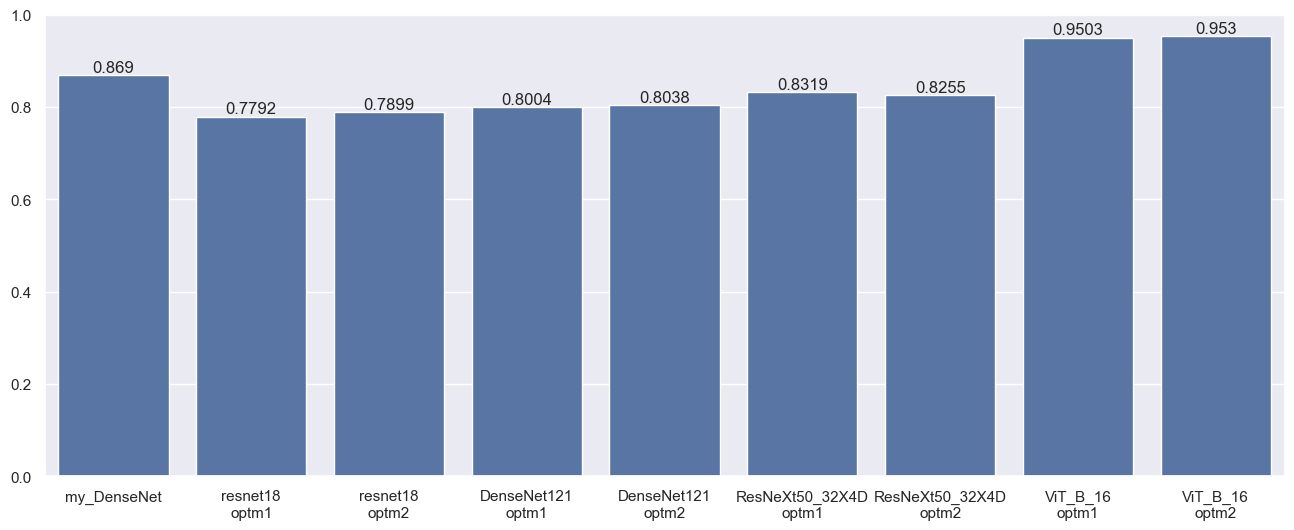

In [11]:
data = { 
    "my_DenseNet": 0.8690,

    "resnet18\noptm1": 0.7792,
    "resnet18\noptm2": 0.7899,

    "DenseNet121\noptm1": 0.8004,
    "DenseNet121\noptm2": 0.8038,

    "ResNeXt50_32X4D\noptm1": 0.8319,
    "ResNeXt50_32X4D\noptm2": 0.8255,

    "ViT_B_16\noptm1": 0.9503,
    "ViT_B_16\noptm2": 0.9530,
}


sns.set(rc={'figure.figsize': (16, 6)})

ax = sns.barplot(data=data)

for i in ax.containers:
    ax.bar_label(i,)